In [1]:
import json

triang_data_file = "./datasets/yolo/triangulation_all.json"

with open(triang_data_file, 'r') as file:
    yolo_triangulation = json.load(file)


selected_names_file = "./datasets/yolo/selected_joint_names.json"

with open(selected_names_file, 'r') as file:
    selected_names = json.load(file)

In [2]:
len(yolo_triangulation)

152

In [3]:
yolo_triangulation['p1s2'][0]

{'lhumerus': [-992.3894594988844, 1907.7266290076557, 1294.2002989100918],
 'rhumerus': [-1251.9784382235641, 1806.2144987034594, 1293.1999762527398],
 'lfemur': [-1049.333194959544, 1890.7435689011782, 846.3441993399281],
 'rfemur': [-1223.269853907474, 1824.2581089987812, 847.4219735541051],
 'ltibia': [-1069.703858276008, 1934.7726569921817, 451.5942119815596],
 'rtibia': [-1209.5932666026722, 1854.1616008669484, 453.8893064134642],
 'lfoot': [-1096.1011799133662, 1961.3866491465508, 63.24419623280128],
 'rfoot': [-1202.1706779380174, 1864.6775329847708, 70.43170802814123]}

In [4]:
def find_local_minima(data, window_size=5):
    local_minima_indices = []
    
    for i in range(window_size, len(data) - window_size):
        window_prev = data[i-window_size:i]
        window_next = data[i+1:i+window_size+1]
        current = data[i]
        
        if current < min(window_prev) and current < min(window_next):
            local_minima_indices.append(i)

    return local_minima_indices

count = 0

for sequence, params in yolo_triangulation.items():
    lfoot_height_z = [frame['lfoot'][2] for frame in params]
    rfoot_height_z = [frame['rfoot'][2] for frame in params]
    left_minima = find_local_minima(lfoot_height_z, 14)
    right_minima = find_local_minima(rfoot_height_z, 14)
    
    sorted_minima = sorted(right_minima + left_minima)
    order = ""

    for minim in sorted_minima:
        if minim in left_minima:
            order += "L"
        else:
            order += "R"

    alternately = True
    for i in range(len(order) - 1):
        if order[i] == order[i+1]:
            alternately = False
            break

    if not alternately :
        count += 1

    print(f"{sequence} | {'OK' if alternately else 'NO' } | {order} | L: {left_minima} | R: {right_minima}")

print(f"ERRORS {count}")

p1s1 | OK | LRLRLR | L: [25, 61, 88] | R: [45, 75, 100]
p1s2 | OK | RLRLRL | L: [33, 55, 87] | R: [16, 49, 72]
p1s3 | OK | LRLRLR | L: [22, 55, 84] | R: [40, 70, 93]
p1s4 | OK | LRLRL | L: [24, 59, 81] | R: [43, 74]
p2s1 | OK | RLRLRLRL | L: [44, 75, 96, 128] | R: [29, 59, 90, 113]
p2s2 | OK | RLRLRLR | L: [33, 59, 86] | R: [24, 44, 79, 100]
p2s3 | OK | LRLRLRL | L: [21, 56, 80, 109] | R: [41, 70, 93]
p2s4 | OK | RLRLRLR | L: [38, 63, 91] | R: [30, 49, 84, 101]
p3s1 | OK | RLRLRLRL | L: [30, 58, 88, 109] | R: [15, 44, 67, 94]
p3s2 | OK | RLRLRL | L: [30, 54, 81] | R: [16, 41, 69]
p3s3 | OK | LRLRLRLR | L: [31, 58, 81, 125] | R: [43, 76, 98, 131]
p3s4 | OK | LRLRL | L: [38, 63, 89] | R: [50, 74]
p4s1 | OK | LRLRL | L: [27, 59, 93] | R: [50, 78]
p4s2 | OK | LRLRLR | L: [25, 56, 85] | R: [38, 76, 100]
p4s3 | OK | RLRLR | L: [38, 71] | R: [29, 60, 95]
p4s4 | OK | RLRLRL | L: [38, 69, 99] | R: [29, 51, 92]
p5s1 | OK | RLRLRLRL | L: [40, 74, 112, 140] | R: [21, 55, 87, 119]
p5s2 | OK | LRLRL

In [5]:
from utils.gait_parameters_extractor import CoordinatesIdx, GaitParametersExtractor, StepsNotFoundException, ParametersExtractionException

c_idx = CoordinatesIdx(0,1,2)
c_idx

CoordinatesIdx(x=0, y=1, z=2)

In [6]:
for i in range(1, 5):
    try:
        seq_key = f'p25s{i}'
        print(seq_key)
        gpe = GaitParametersExtractor(yolo_triangulation[seq_key], CoordinatesIdx(0,1,2), scale_factor=1, minima_window_size=14)
        # print(gpe.start_position, gpe.finish_position)
        print(gpe.l_steps, gpe.r_steps)
        print(gpe.calculate_mean_stride_time_and_length())
        print(gpe.calculate_mean_step_time_length_and_width())
        print(gpe.calculate_avg_max_hip_angle_per_stride())
        print(gpe.calculate_avg_max_knee_angle_per_stride())
        print(gpe.calculate_avg_max_legs_angle_for_steps())
    except (StepsNotFoundException, ParametersExtractionException) as e:
        print(f"{seq_key} - {e}")

p25s1
[37, 64] [23, 49, 77]
(1.08, 1.08, 1.08, 1708.284165547757, 1589.0786661345537, 1628.8138326056214)
(0.5, 0.5800000000000001, 0.54, 769.1164973672164, 819.9621687673372, 794.5393330672769, 84.0593441467128, 91.80552302012569, 87.93243358341925)
(25.864701177189772, 23.621768272993222, 24.369412574392072)
(55.92802337852521, 56.74245415043508, 56.47097722646512)
(21.88503373743263, 26.56327538421704, 24.224154560824836)
p25s2
[36, 63] [21, 49]
(1.08, 1.12, 1.1, 1619.2379226022792, 1704.1745680043714, 1661.7062453033254)
(0.52, 0.5800000000000001, 0.56, 841.0908828445051, 820.6153624588203, 827.4405359207152, 16.11953215188935, 65.5522843531584, 49.07470028606872)
(19.350199120620942, 20.792419354444405, 20.071309237532674)
(51.27248621667799, 55.405998995510544, 53.33924260609427)
(19.827051991441177, 22.145169006608654, 21.372463334886163)
p25s3
[31, 58] [14, 43, 69]
(1.08, 1.1, 1.0933333333333335, 1709.296896220854, 1632.1810597112715, 1657.886338547799)
(0.45999999999999996, 0.

In [7]:
feature_names = "l_mean_stride_time, r_mean_stride_time, total_mean_stride_time, \
l_mean_stride_dist, r_mean_stride_dist, total_mean_stride_dist, l_r_mean_step_times, \
r_l_mean_step_times, total_mean_step_times, l_r_mean_step_dist, r_l_mean_step_dist, \
total_mean_step_distance, l_r_mean_step_width, r_l_mean_step_width, total_mean_step_width, \
l_mean_max_hip_angle_diff, r_mean_max_hip_angle_diff, total_mean_max_hip_angle_diff, \
l_mean_max_knee_angle_diff, r_mean_max_knee_angle_diff, total_mean_max_knee_angle_diff, \
l_r_mean_step_l_angle, r_l_mean_step_l_angle, total_mean_step_l_angle".replace(' ', '').split(',')

len(feature_names)

24

In [8]:
import pandas as pd

sequence_features = []
sequence_participants = []

for seq_key in yolo_triangulation.keys():
    try:
        participant = int(seq_key[1:-2])
        gpe = GaitParametersExtractor(yolo_triangulation[seq_key], CoordinatesIdx(0,1,2), scale_factor=1, minima_window_size=14)
        features = (gpe.calculate_mean_stride_time_and_length()
                    + gpe.calculate_mean_step_time_length_and_width()
                    + gpe.calculate_avg_max_hip_angle_per_stride()
                    + gpe.calculate_avg_max_knee_angle_per_stride()
                    + gpe.calculate_avg_max_legs_angle_for_steps())
    
        sequence_participants.append(participant)
        sequence_features.append(features)
        
    except (StepsNotFoundException, ParametersExtractionException) as e:
        print(f"{seq_key} - {e}")

df = pd.DataFrame(sequence_features, columns=feature_names)
df['participant'] = sequence_participants

# df.to_csv('./datasets/triangulation_gait_features.csv', index=False)

p19s2 - Falied to find proper step frame keys
p25s4 - Less than two steps from right leg found


In [9]:
participants = df['participant']
features_df = df.drop(columns=['participant'])

features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
l_mean_stride_time,150.0,1.132356,0.140676,0.800000,1.040000,1.100000,1.225000,1.560000
r_mean_stride_time,150.0,1.115067,0.169439,0.680000,1.000000,1.080000,1.225000,1.680000
total_mean_stride_time,150.0,1.124174,0.143338,0.820000,1.027500,1.100000,1.215333,1.620000
l_mean_stride_dist,150.0,1402.515302,166.409646,977.693739,1299.172865,1392.533801,1499.013797,1920.981704
r_mean_stride_dist,150.0,1410.978283,154.769674,1042.761954,1303.231904,1411.909094,1493.487657,1903.704899
total_mean_stride_dist,150.0,1403.417293,156.454225,1071.382089,1307.687944,1401.870815,1499.382765,1900.943491
l_r_mean_step_times,150.0,0.596333,0.142839,0.213333,0.500000,0.586667,0.680000,0.920000
r_l_mean_step_times,150.0,0.529956,0.127842,0.240000,0.440000,0.526667,0.607500,0.910000
total_mean_step_times,150.0,0.565694,0.074979,0.413333,0.520000,0.550000,0.606667,0.820000
l_r_mean_step_dist,150.0,692.724245,81.583642,487.619308,639.846558,694.958162,739.305775,970.634601


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)
features_scaled_df = pd.DataFrame(features_scaled)
features_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.910407,-0.089219,0.390776,0.601747,0.346786,0.512897,0.119413,0.392766,0.459072,0.521010,...,-0.752375,1.294683,0.995916,1.231337,-0.845562,-0.247733,-0.634223,-0.787728,-0.650425,-1.253335
1,-0.373419,0.029213,-0.169215,0.728589,0.661890,0.736209,0.447215,-0.182779,0.030859,1.066604,...,0.302473,1.180240,1.630046,1.553099,0.041787,-1.089299,-0.596695,2.346320,0.304492,1.863978
2,0.767759,-0.326083,0.180779,0.732103,0.598754,0.706850,-0.255217,0.392766,0.030859,0.585501,...,-0.677136,0.607997,1.741228,1.340793,-0.868613,2.900948,1.175374,-0.376114,-0.396182,-0.738612
3,0.054523,0.739805,0.344110,1.128506,1.629719,1.349907,0.587702,-0.549036,0.057622,1.517453,...,-0.406343,1.275675,1.756123,1.484970,0.765980,-0.418416,0.445359,0.391952,1.242722,1.156569
4,-0.088124,0.029213,-0.029217,-2.561419,-1.351476,-2.009313,0.213071,-0.078135,0.000272,-1.638047,...,-0.323328,-0.278015,0.043688,-0.100820,-1.776708,-1.010572,-1.626681,1.151760,-0.786372,0.267402


In [11]:
import json

with open("./datasets/train_test_split.json", "r") as f:
    train_test_split = json.load(f)

test_participants = list(set([int(seq[1:-2] )for seq in train_test_split["test"]]))[:3]
test_participants += list(set([int(seq[1:-2] )for seq in train_test_split["valid"]]))[:3]

train_participants = [person for person in list(set([int(seq[1:-2] )for seq in train_test_split["train"]])) if person not in test_participants]

print(f"test_participants: {test_participants}")
print(f"train_participants: {train_participants}")

test_participants: [4, 13, 16, 3, 8, 19]
train_participants: [1, 2, 5, 6, 7, 9, 10, 11, 12, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [12]:
test_participants

[4, 13, 16, 3, 8, 19]

In [13]:
import torch
from torch.utils.data import DataLoader, random_split
from utils.torch_siamese import SiameseGaitDataset, SiameseNetwork, ContrastiveLoss, compute_similarity

model = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_ds = SiameseGaitDataset(train_participants, participants, features_scaled_df)
test_ds = SiameseGaitDataset(test_participants, participants, features_scaled_df)
print(f"Train dataset size = {len(train_ds)}")
print(f"Test dataset size = {len(test_ds)}")

for epoch in range(10):
    train_ds.regenerate_pairs()
    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
    
    model.train()
    train_loss = 0
    for x1, x2, label in train_loader:
        out1, out2 = model(x1, x2)
        loss = criterion(out1, out2, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}, Train Loss: {train_loss / len(train_loader):.4f}")


Train dataset size = 570
Test dataset size = 66
Epoch 1, Train Loss: 0.2513
Epoch 2, Train Loss: 0.1769
Epoch 3, Train Loss: 0.1608
Epoch 4, Train Loss: 0.1470
Epoch 5, Train Loss: 0.1350
Epoch 6, Train Loss: 0.1296
Epoch 7, Train Loss: 0.1191
Epoch 8, Train Loss: 0.1117
Epoch 9, Train Loss: 0.1031
Epoch 10, Train Loss: 0.1069


In [67]:
y_true = []
y_pred = []

threshold = 0.5
for x1, x2, label in test_ds.data:
    y_true.append(label.item() == 0)
    y_pred.append(compute_similarity(x1, x2, model).item() < threshold)


In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred, labels=[True, False])

class_names = ['True', 'False']
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
       True  False
True     18     15
False     3     30


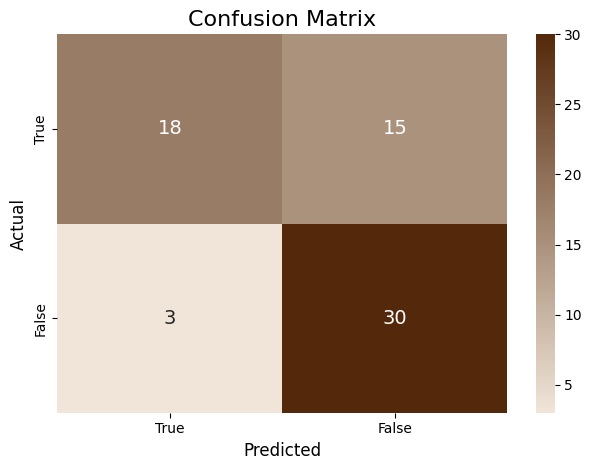

In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

sns.heatmap(cm_df, annot=True, fmt='d', cmap=LinearSegmentedColormap.from_list("brownish", ["#f0e5d8", "#54290b"]), annot_kws={"size": 14})
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)

plt.tight_layout()
plt.savefig('./plots/confusion_matrix_siamese_triangulation.png')
plt.show()

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.727
Precision: 0.857
Recall: 0.545
